In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, wilcoxon
import numpy as np
from helper import p_values, p_values_ras, p_values_wilcoxon, p_values_ras_wilcoxon

In [8]:
hecras = pd.read_csv('../data/ras_1920.csv')
print(hecras.shape)

ras = hecras[['T2 RAS S1','T2 RAS S25A', 'T2 RAS S25B', 'RAS S26']].values
obs = hecras[['S1 OBS', 'S25A_TW OBS' , 'S25B_TW OBS', 'S26_TW OBS']].values
ras_error = ras - obs
print(ras_error.shape)

ras_error = ras_error.reshape((-1,))
print(ras_error.shape)

(17519, 10)
(17519, 4)
(70076,)


In [11]:
true_to_seires = pd.read_csv('../output/inv_y_rnn.csv', index_col=0)

mlp_raw = pd.read_csv('../output/inv_yhat_mlp.csv', index_col=0)
rnn_raw = pd.read_csv('../output/inv_yhat_rnn.csv', index_col=0)
lstm_raw = pd.read_csv('../output/inv_yhat_lstm.csv', index_col=0)
cnn_raw = pd.read_csv('../output/inv_yhat_cnn.csv', index_col=0)
rcnn_raw = pd.read_csv('../output/inv_yhat_rcnn.csv', index_col=0)

print(true_to_seires.shape, mlp_raw.shape, rnn_raw.shape, lstm_raw.shape, cnn_raw.shape, rcnn_raw.shape)

(19249, 96) (19249, 96) (19249, 96) (19249, 96) (19249, 96) (19249, 96)


In [12]:
true_to_seires = true_to_seires.iloc[-17519:, :]

mlp = mlp_raw.iloc[-17519:, :]
rnn = rnn_raw.iloc[-17519:, :]
lstm = lstm_raw.iloc[-17519:, :]
cnn = conv_mlp_raw.iloc[-17519:, :]
rcnn = conv_rnn_raw.iloc[-17519:, :]

print(true_to_seires.shape, mlp.shape, rnn.shape, lstm.shape, cnn.shape, rcnn.shape)

(17519, 96) (17519, 96) (17519, 96) (17519, 96) (17519, 96) (17519, 96)


In [14]:
mlp_2yrs_error = mlp - true_to_seires
rnn_2yrs_error = rnn - true_to_seires
lstm_2yrs_error = lstm - true_to_seires
cnn_2yrs_error = cnn - true_to_seires
rcnn_2yrs_error = rcnn - true_to_seires

print(mlp_2yrs_error.shape, rnn_2yrs_error.shape, 
      lstm_2yrs_error.shape, cnn_2yrs_error.shape, rcnn_2yrs_error.shape
     )

(17519, 96) (17519, 96) (17519, 96) (17519, 96) (17519, 96)


In [16]:
def concat_df(df, i):
    """
    use to concatenate 4 locations at one time point
    @df: dataframe of prediction errors
    @i: time point
    """
    a = df.iloc[:, i:i+1].values
    b = df.iloc[:, i+1:i+2].values
    c = df.iloc[:, i+2:i+3].values
    d = df.iloc[:, i+3:i+4].values
    e = np.concatenate((a, b, c, d), axis=0)
    dataframe = pd.DataFrame(e)
    
    return dataframe.values.reshape(-1,)

### Mann-Whitney U Test

In [19]:
# u_stat, p_value_mannwhitney1 = mannwhitneyu(rcnn_errors_t1, mlp_errors_t1)
# u_stat, p_value_mannwhitney2 = mannwhitneyu(rcnn_errors_t1, rnn_errors_t1)
# u_stat, p_value_mannwhitney3 = mannwhitneyu(rcnn_errors_t1, lstm_errors_t1)
# u_stat, p_value_mannwhitney4 = mannwhitneyu(rcnn_errors_t1, cnn_errors_t1)
# u_stat, p_value_mannwhitney5 = mannwhitneyu(rcnn_errors_t1, ras_error)


# print(p_value_mannwhitney1,'\n',
#       p_value_mannwhitney2,'\n',
#       p_value_mannwhitney3,'\n',
#       p_value_mannwhitney4,'\n',
# #       p_value_mannwhitney5
#      )

### Wilcoxon Test

#### for different forecast lead times

In [33]:
t_start = [0, 28, 60, 92]   # t+1, t+8, t+16, t+24 over 4 locations

for t in t_start:
    mlp_errors_t1 = concat_df(mlp_2yrs_error, t)
    rnn_errors_t1 = concat_df(rnn_2yrs_error, t)
    lstm_errors_t1 = concat_df(lstm_2yrs_error, t)
    cnn_errors_t1 = concat_df(cnn_2yrs_error, t)
    rcnn_errors_t1 = concat_df(rcnn_2yrs_error, t)

    #print(mlp_errors_t1.shape, rnn_errors_t1.shape, lstm_errors_t1.shape, cnn_errors_t1.shape, rcnn_errors_t1.shape)
    u_stat, p_value_wilcoxon1 = wilcoxon(rcnn_errors_t1, mlp_errors_t1)
    u_stat, p_value_wilcoxon2 = wilcoxon(rcnn_errors_t1, rnn_errors_t1)
    u_stat, p_value_wilcoxon3 = wilcoxon(rcnn_errors_t1, lstm_errors_t1)
    u_stat, p_value_wilcoxon4 = wilcoxon(rcnn_errors_t1, cnn_errors_t1)
    u_stat, p_value_wilcoxon5 = wilcoxon(rcnn_errors_t1, ras_error)
    
    print(p_value_wilcoxon1,'\n',
      p_value_wilcoxon2,'\n',
      p_value_wilcoxon3,'\n',
      p_value_wilcoxon4,'\n',
      p_value_wilcoxon5
     )
    print('======================')

1.1498861814366294e-21 
 4.597675264784962e-109 
 0.0 
 4.1939399712806075e-73 
 0.0
1.8742396575895505e-18 
 0.0 
 0.0 
 1.0877770243598408e-57 
 0.0
2.3483041364765616e-08 
 0.0 
 0.0 
 0.0 
 0.0
1.0581117307490894e-27 
 0.0 
 0.0 
 0.0 
 0.0


#### for different locations (24-hour-ahead prediction)

In [40]:
mlp_2yrs_error_24hr = mlp_2yrs_error.iloc[:, -4:]
rnn_2yrs_error_24hr = rnn_2yrs_error.iloc[:, -4:]
lstm_2yrs_error_24hr = lstm_2yrs_error.iloc[:, -4:]
cnn_2yrs_error_24hr = cnn_2yrs_error.iloc[:, -4:]
rcnn_2yrs_error_24hr = rcnn_2yrs_error.iloc[:, -4:]

print(mlp_2yrs_error_24hr.shape, rnn_2yrs_error_24hr.shape, 
      lstm_2yrs_error_24hr.shape, cnn_2yrs_error_24hr.shape, rcnn_2yrs_error_24hr.shape
     )

(17519, 4) (17519, 4) (17519, 4) (17519, 4) (17519, 4)


In [41]:
ras = hecras[['T2 RAS S1','T2 RAS S25A', 'T2 RAS S25B', 'RAS S26']].values
obs = hecras[['S1 OBS', 'S25A_TW OBS' , 'S25B_TW OBS', 'S26_TW OBS']].values
ras_error = ras - obs
print(ras_error.shape)

(17519, 4)


In [45]:
u_stat, p_value_wilcoxon = wilcoxon(mlp_2yrs_error_24hr, ras_error)
print('S1, S25A, S25B, S26:', p_value_wilcoxon)

S1, S25A, S25B, S26: [0.00000000e+000 1.17488635e-039 1.69589431e-165 0.00000000e+000]


In [46]:
u_stat, p_value_wilcoxon = wilcoxon(rnn_2yrs_error_24hr, ras_error)
print('S1, S25A, S25B, S26:', p_value_wilcoxon)

S1, S25A, S25B, S26: [1.73969617e-180 3.89190744e-102 7.81807807e-021 0.00000000e+000]


In [47]:
u_stat, p_value_wilcoxon = wilcoxon(lstm_2yrs_error_24hr, ras_error)
print('S1, S25A, S25B, S26:', p_value_wilcoxon)

S1, S25A, S25B, S26: [4.01434436e-165 4.45283707e-038 1.49737196e-001 0.00000000e+000]


In [48]:
u_stat, p_value_wilcoxon = wilcoxon(cnn_2yrs_error_24hr, ras_error)
print('S1, S25A, S25B, S26:', p_value_wilcoxon)

S1, S25A, S25B, S26: [9.46540846e-252 2.54900470e-182 3.39111957e-009 0.00000000e+000]


In [49]:
u_stat, p_value_wilcoxon = wilcoxon(rcnn_2yrs_error_24hr, ras_error)
print('S1, S25A, S25B, S26:', p_value_wilcoxon)

S1, S25A, S25B, S26: [5.04092159e-010 4.46270942e-181 1.87732220e-035 0.00000000e+000]


In [34]:
# plt.figure(figsize=(12, 5))
# # sns.histplot(mlp_errors_t1, kde=True, label='MLP_errors', stat='density', bins=30, edgecolor='none')
# sns.histplot(rnn_errors_t1, kde=True, label='RNN_errors', stat='density', bins=30, edgecolor='none')
# sns.histplot(cnn_errors_t1, kde=True, label='CNN_errors', stat='density', bins=30, edgecolor='none')
# # sns.histplot(lstm_errors_t1, kde=True, label='MLP_errors', stat='density', bins=30, edgecolor='none')
# sns.histplot(rcnn_errors_t1, kde=True, label='RCNN_errors', stat='density', bins=30, edgecolor='none')
# # sns.histplot(ras_error, kde=True, label='RAS_errors', stat='density', bins=30, edgecolor='none')


# # plt.title(f'\n p-value: {p_value_mannwhitney:.2e}')
# plt.legend()

Small sample size (n=50), p-value: 7.09e-01
Large sample size (n=100000), p-value: 7.81e-01


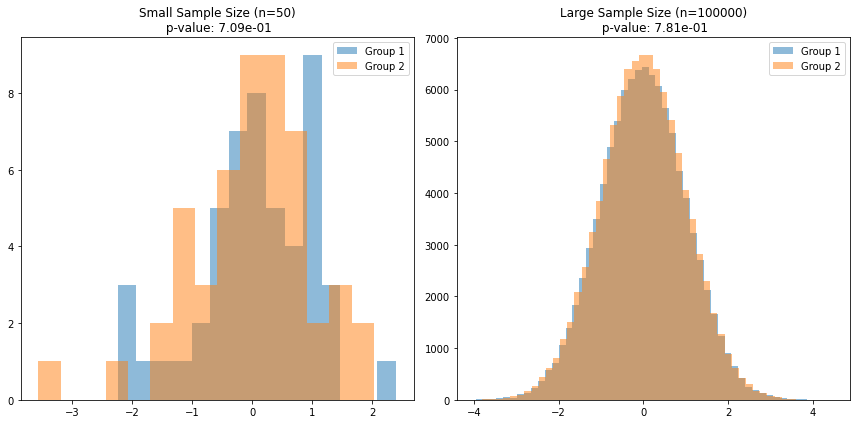

In [5]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import mannwhitneyu, wilcoxon

# # Generating synthetic data for demonstration
# np.random.seed(1234)
# small_sample_size = 50
# large_sample_size = 100000

# # Small difference in mean
# # small_diff = 0.05
# small_diff = 0.000005

# # Generate data with small sample size
# small_series1 = np.random.normal(0, 1, small_sample_size)
# small_series2 = np.random.normal(small_diff, 1, small_sample_size)

# # Generate data with large sample size
# large_series1 = np.random.normal(0, 1, large_sample_size)
# large_series2 = np.random.normal(small_diff, 1, large_sample_size)

# # Perform Mann-Whitney U Test for small sample size
# u_stat_small, p_value_small = wilcoxon(small_series1, small_series2, alternative='two-sided')
# print(f"Small sample size (n={small_sample_size}), p-value: {p_value_small:.2e}")

# # Perform Mann-Whitney U Test for large sample size
# u_stat_large, p_value_large = wilcoxon(large_series1, large_series2, alternative='two-sided')
# print(f"Large sample size (n={large_sample_size}), p-value: {p_value_large:.2e}")

# # Visualize the distributions
# plt.figure(figsize=(12, 6))

# # Small sample size
# plt.subplot(1, 2, 1)
# plt.hist(small_series1, bins=15, alpha=0.5, label='Group 1')
# plt.hist(small_series2, bins=15, alpha=0.5, label='Group 2')
# plt.title(f'Small Sample Size (n={small_sample_size})\n p-value: {p_value_small:.2e}')
# plt.legend()

# # Large sample size
# plt.subplot(1, 2, 2)
# plt.hist(large_series1, bins=50, alpha=0.5, label='Group 1')
# plt.hist(large_series2, bins=50, alpha=0.5, label='Group 2')
# plt.title(f'Large Sample Size (n={large_sample_size})\n p-value: {p_value_large:.2e}')
# plt.legend()

# plt.tight_layout()
# plt.show()


In [ ]:
large_series1

In [ ]:
large_series2

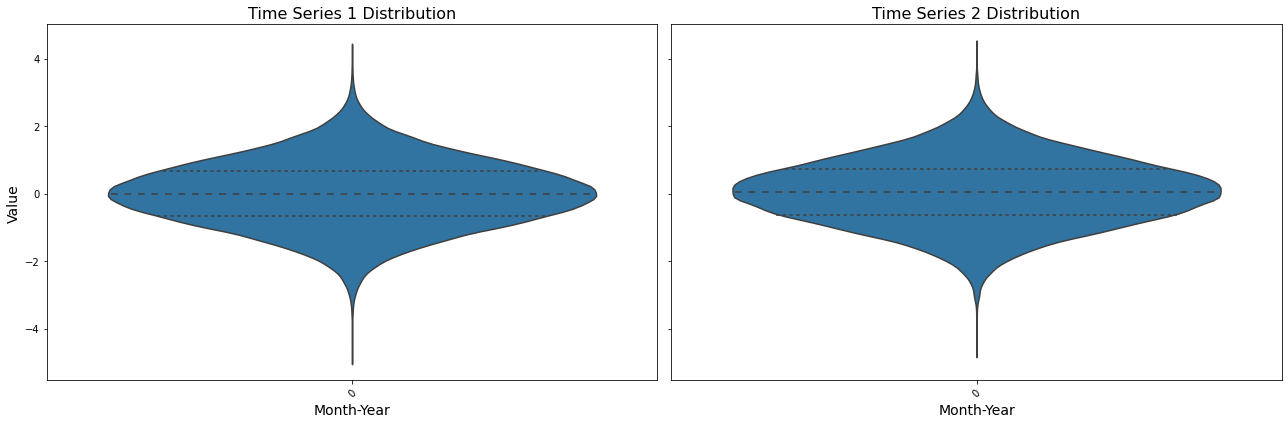

In [181]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Plot the first time series
sns.violinplot( data=large_series1, inner='quartile', scale='width', ax=axes[0])
axes[0].set_title('Time Series 1 Distribution', fontsize=16)
axes[0].set_xlabel('Month-Year', fontsize=14)
axes[0].set_ylabel('Value', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

# Plot the second time series
sns.violinplot(data=large_series2, inner='quartile', scale='width', ax=axes[1])
axes[1].set_title('Time Series 2 Distribution', fontsize=16)
axes[1].set_xlabel('Month-Year', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

<AxesSubplot:>

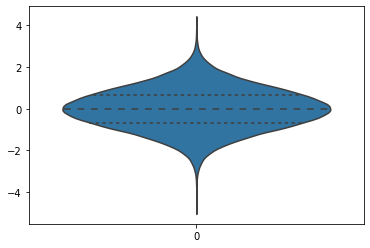

In [180]:
sns.violinplot(data=large_series1, inner='quartile', scale='width')

<AxesSubplot:>

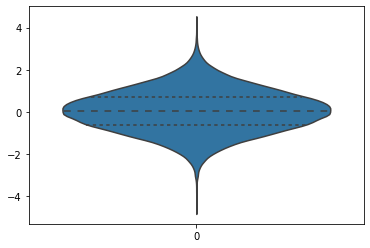

In [179]:
sns.violinplot(data=large_series2, inner='quartile', scale='width')
